In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

import tensorflow as tf

#Bibliotecas para treino eficiente da rede
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
#Bibliotecas para montar a rede neural
from tensorflow.keras.layers import Input #Input Layer
from tensorflow.keras.layers import Dense #Dense Layer (Fully connected)
from tensorflow.keras.models import Model #Model Structure
from tensorflow.keras.layers import BatchNormalization #Normalization Layer
from tensorflow.keras.layers import Dropout #Regularization Layer
from tensorflow.keras.layers import Flatten #Reshaping Layer

#Dataset de exemplo do Keras

https://keras.io/api/datasets/

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

##Montando a MLP

https://keras.io/api/layers/

In [ ]:
model = tf.keras.Sequential()
#Reshaping
model.add(Flatten(input_shape = (28, 28, 1)))
#Core
#Regular densely-connected NN layer.
model.add(Dense(128, activation = "relu"))
model.add(Dense(10))

##Montando e compilando o modelo

https://keras.io/api/optimizers/

https://keras.io/api/losses/

https://keras.io/api/metrics/

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()],
)

##Treinando o modelo

https://keras.io/api/models/model_training_apis/

https://keras.io/api/callbacks/

In [ ]:
es = EarlyStopping(monitor = 'val_sparse_categorical_accuracy', mode = 'max', verbose = 0, min_delta = .01, patience = 10)
mc = ModelCheckpoint('bestmodel.h5', monitor = 'val_sparse_categorical_accuracy', mode = 'max', verbose = 0, save_best_only = True)
hist = model.fit(x = x_train, y = y_train,
                 epochs = 4000,
                 verbose = 1,
                 validation_data = (x_test, y_test),
                 callbacks = [es, mc])

Epoch 1/4000
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3720 - sparse_categorical_accuracy: 0.8693 - val_loss: 0.4892 - val_sparse_categorical_accuracy: 0.8902
Epoch 2/4000
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3510 - sparse_categorical_accuracy: 0.9176 - val_loss: 0.3876 - val_sparse_categorical_accuracy: 0.9173
Epoch 3/4000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2789 - sparse_categorical_accuracy: 0.9301 - val_loss: 0.2881 - val_sparse_categorical_accuracy: 0.9322
Epoch 4/4000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2547 - sparse_categorical_accuracy: 0.9362 - val_loss: 0.3065 - val_sparse_categorical_accuracy: 0.9368
Epoch 5/4000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2294 - sparse_categorical_accuracy: 0.9417 - val_loss: 0.2737 - val_sparse_categorical_accuracy: 0.9405
Epoch 6/4000
1875/1875 [==============================] - 5s 3ms/step - loss: 0.

##Medindo o modelo

In [ ]:
best_model = tf.keras.models.load_model('bestmodel.h5')
_, train_acc = best_model.evaluate(x_train, y_train, verbose = 0)
_, test_acc = best_model.evaluate(x_test, y_test, verbose = 0)
preds = best_model.predict(x_test, verbose = 0)
print(f'Train: {train_acc:.3f}, Test: {test_acc:.3f}' )
print(confusion_matrix(y_test, np.argmax(preds, axis = 1)))

Train: 0.968, Test: 0.952
[[ 965    0    0    0    0    3    5    3    4    0]
 [   0 1104    4    2    1    2    3    2   17    0]
 [   5    2  983    3    3    0    4    7   25    0]
 [   1    0   10  943    0   14    0    5   35    2]
 [   2    1    1    0  948    0    7    3    7   13]
 [   3    0    1   13    3  819   22    4   24    3]
 [   6    2    1    0    1    6  938    0    4    0]
 [   0    6   20    5    3    1    0  971    9   13]
 [   8    0   11    8    8    1    7    2  926    3]
 [   5    2    0    7   30    2    0   10   26  927]]


##Evolução do treinamento

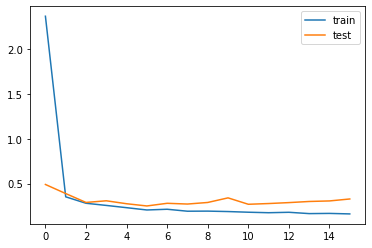

In [ ]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()
plt.show()